## Library Inizialitation

In [ ]:
import os
import shutil
import zipfile
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from shutil import copyfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

## Dataset
With Kaggle API, we gonna extract the data into our environment

Dataset that we are using: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification

With Kaggle API, we gonna extract the data into our environment

Dataset that we are using: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuandikaalfahreiza","key":"5003d63c5582d449aebf99cd97cc101f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d asdasdasasdas/garbage-classification

 77% 63.0M/82.0M [00:02<00:00, 23.5MB/s]
100% 82.0M/82.0M [00:03<00:00, 28.3MB/s]


In [ ]:
local_zip = '/content/garbage-classification.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install split-folders
import splitfolders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
base_dir = '/content/garbage classification/Garbage classification'
splitfolders.ratio(base_dir, 
                   '/content/garbage classification', 
                   ratio=(.8, .2))

TRAINING_DIR = "/content/garbage classification/train/"
TESTING_DIR = "/content/garbage classification/val/"

Copying files: 2527 files [00:00, 8146.01 files/s]


In [ ]:
# Check that the number of images matches the expected output
print(f"\nThere are {len(os.listdir('/content/garbage classification/train/cardboard'))} images of cardboard for training")
print(f"There are {len(os.listdir('/content/garbage classification/train/glass'))} images of glass for training")
print(f"There are {len(os.listdir('/content/garbage classification/train/metal'))} images of metal for training")
print(f"There are {len(os.listdir('/content/garbage classification/train/paper'))} images of paper for training")
print(f"There are {len(os.listdir('/content/garbage classification/train/plastic'))} images of plastic for training")
print(f"There are {len(os.listdir('/content/garbage classification/train/trash'))} images of trash for training")

print(f"There are {len(os.listdir('/content/garbage classification/val/cardboard'))} images of cardboard for testing")
print(f"There are {len(os.listdir('/content/garbage classification/val/glass'))} images of glass for testing")
print(f"There are {len(os.listdir('/content/garbage classification/val/metal'))} images of metal for testing")
print(f"There are {len(os.listdir('/content/garbage classification/val/paper'))} images of paper for testing")
print(f"There are {len(os.listdir('/content/garbage classification/val/plastic'))} images of plastic for testing")
print(f"There are {len(os.listdir('/content/garbage classification/val/trash'))} images of trash for testing")



There are 322 images of cardboard for training
There are 400 images of glass for training
There are 328 images of metal for training
There are 475 images of paper for training
There are 385 images of plastic for training
There are 109 images of trash for training
There are 81 images of cardboard for testing
There are 101 images of glass for testing
There are 82 images of metal for testing
There are 119 images of paper for testing
There are 97 images of plastic for testing
There are 28 images of trash for testing


## Training and Validation Generators


In [ ]:
# train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest',
                                     dtype=tf.uint8)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=128,
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest',
                                     dtype=tf.uint8)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=60,
                                                                target_size=(224,224))
  return train_generator, validation_generator


In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


## Pre-trained Model
Create the pre-trained models

Complete the pre-trained model by customizing the input shape into our preference

In [ ]:
# GRADED FUNCTION: create_pre_trained_model
def create_pre_trained_model():
  ### START CODE HERE
  pre_trained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model

pre_trained_model = create_pre_trained_model()
pre_trained_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

## Creating Callbacks
Callback will stop the training when i reaches accuracy of 88%

In [ ]:
# Define a Callback class that stops training once accuracy reaches 87%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.87):
      print("\nReached 87% accuracy so cancelling training!")
      self.model.stop_training = True

## Pipelining pre-trained model
last output of pre-trained model will be attach to our own model

In [ ]:
def output_of_last_layer(pre_trained_model):
  last_desired_layer = pre_trained_model.get_layer('block_16_project_BN')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

last_output = output_of_last_layer(pre_trained_model)
last_output.dtype

last layer output shape:  (None, 7, 7, 320)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 320), dtype=tf.float32, name=None), name='block_16_project_BN/FusedBatchNormV3:0', description="created by layer 'block_16_project_BN'")


tf.float32

In [ ]:
def create_final_model(pre_trained_model, last_output):
  x = layers.Flatten()(last_output)

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.3
  x = layers.Dropout(0.3)(x) 
  # Add a final sigmoid layer for classification
  x = layers.Dense(6, activation='softmax')(x)    

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
  
  return model


In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)
print(model)

model.dtype

'float32'

Training the model

In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    callbacks=callbacks)

Epoch 1/100
16/16 [==============================] - 53s 2s/step - loss: 2.4685 - accuracy: 0.5731 - val_loss: 0.9194 - val_accuracy: 0.7028
Epoch 2/100
16/16 [==============================] - 31s 2s/step - loss: 0.8498 - accuracy: 0.7316 - val_loss: 0.7964 - val_accuracy: 0.7500
Epoch 3/100
16/16 [==============================] - 33s 2s/step - loss: 0.7374 - accuracy: 0.7548 - val_loss: 0.6679 - val_accuracy: 0.7776
Epoch 4/100
16/16 [==============================] - 31s 2s/step - loss: 0.5827 - accuracy: 0.7870 - val_loss: 0.7364 - val_accuracy: 0.7520
Epoch 5/100
16/16 [==============================] - 31s 2s/step - loss: 0.5033 - accuracy: 0.8222 - val_loss: 0.6669 - val_accuracy: 0.7874
Epoch 6/100
16/16 [==============================] - 31s 2s/step - loss: 0.3927 - accuracy: 0.8559 - val_loss: 0.6281 - val_accuracy: 0.7815
Epoch 7/100
16/16 [==============================] - 31s 2s/step - loss: 0.3760 - accuracy: 0.8593 - val_loss: 0.5746 - val_accuracy: 0.8169
Epoch 8/100
1

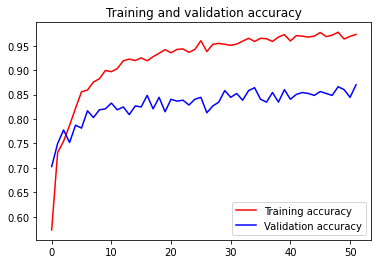

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Exporting to TFLite

In [ ]:
# Use the tf.saved_model API to save your model in the SavedModel format. 
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

# Post-training quantization

# Use the TFLiteConverter SavedModel API to initialize the converter
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

def representative_data_gen():
  for i in range(10):
    image = tf.random.uniform([1, 224, 224, 3])
    yield [image]
    
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_quant_model = converter.convert()

INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
import pathlib

tflite_model_file = pathlib.Path('saved_model/1/model.tflite')
tflite_model_file.write_bytes(tflite_quant_model)

18324920